<a href="https://colab.research.google.com/github/Rachel-0420/Cross-Entropy-Fast-Transient/blob/Normal-Distributions/HighD%20Normal%20Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Shifted

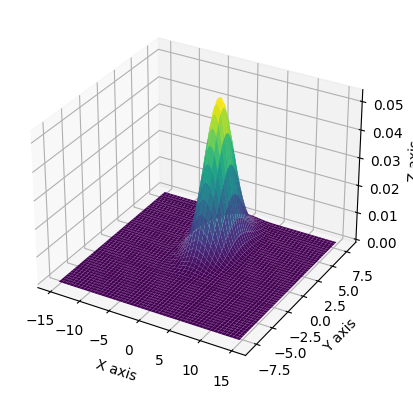

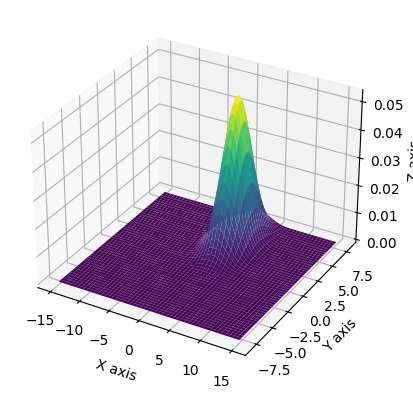

(45.57141571922802, 74.868984959564)


In [2]:
H_x12 = []
H_y12 = []

ref_1, ref_2 = 0, 0

mu_x1, mu_y1 = 0, 3
mu_x2, mu_y2 = 2, 4

variance = 3

x = np.linspace(-15,15,500)
y = np.linspace(-8,8,500)

X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

func_1 = multivariate_normal([mu_x1, mu_y1], [[variance, 0], [0, variance]])
func_2 = multivariate_normal([mu_x2, mu_y2], [[variance, 0], [0, variance]])

# normalizing the probabilities
fact_1 = 1 / sum(func_1.pdf(pos))
fact_2 = 1 / sum(func_2.pdf(pos))
for i in range(len(func_1.pdf(pos))):
  func_1.pdf(pos)[i] *= fact_1
for j in range(len(func_2.pdf(pos))):
  func_2.pdf(pos)[j] *= fact_2

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_1.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_2.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# projections
pdf_x1 = norm.pdf(x, mu_x1, variance)
pdf_y1 = norm.pdf(y, mu_y1, variance)
pdf_x2 = norm.pdf(x, mu_x2, variance)
pdf_y2 = norm.pdf(y, mu_y2, variance)

for i in range(len(pdf_x1)):
  H_x12.append(- pdf_x1[i] * math.log(pdf_x2[i]))
  H_y12.append(- pdf_y1[i] * math.log(pdf_y2[i]))
  ref_1 += H_x12[i]
  ref_2 += H_y12[i]

# ref is the 'integral' of cross entropy of each dimensions
print((ref_1, ref_2))

In [3]:
var1 = func_1.pdf(pos)
var2 = func_2.logpdf(pos)

In [4]:
# overall cross entropy
H1 = - var1 * var2
print(H1)

[[3.59784079e-25 4.83457991e-25 6.48859017e-25 ... 4.75889011e-25
  3.54645667e-25 2.63973437e-25]
 [4.03910887e-25 5.42748943e-25 7.28428944e-25 ... 5.33912768e-25
  3.97890993e-25 2.96165504e-25]
 [4.53295142e-25 6.09103527e-25 8.17477722e-25 ... 5.98806410e-25
  4.46257029e-25 3.32169873e-25]
 ...
 [2.54137272e-18 3.40875906e-18 4.56660263e-18 ... 2.85736508e-18
  2.13587444e-18 1.59460080e-18]
 [2.41226149e-18 3.23559757e-18 4.33464579e-18 ... 2.71351937e-18
  2.02833011e-18 1.51429561e-18]
 [2.28893821e-18 3.07019795e-18 4.11308516e-18 ... 2.57605457e-18
  1.92555740e-18 1.43755426e-18]]


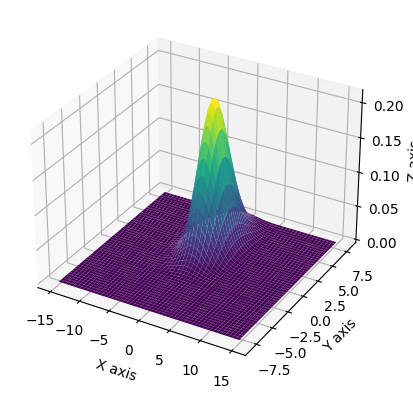

In [5]:
# Figure of the overall cross entropy
fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, H1, cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Different variance

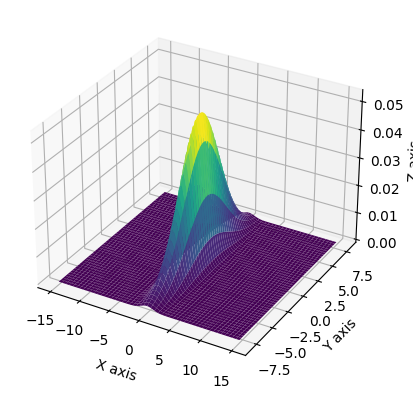

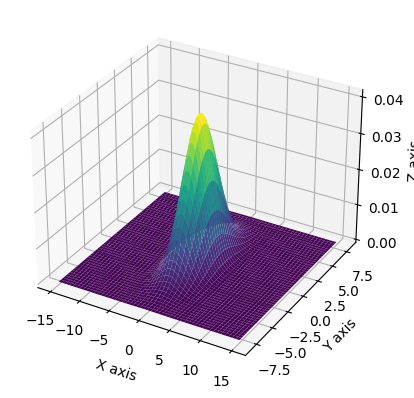

(34.48266941122472, 56.95741095765778)


In [6]:
H_x34 = []
H_y34 = []

ref_3, ref_4 = 0, 0

mu = 0
variance_x3, variance_y3 = 1, 9
variance_x4, variance_y4 = 3, 5

func_3 = multivariate_normal([mu, mu], [[variance_x3, 0], [0, variance_y3]])
func_4 = multivariate_normal([mu, mu], [[variance_x4, 0], [0, variance_y4]])

# normalizing the probabilities
fact_3 = 1 / sum(func_3.pdf(pos))
fact_4 = 1 / sum(func_4.pdf(pos))
for i in range(len(func_3.pdf(pos))):
  func_3.pdf(pos)[i] *= fact_3
for j in range(len(func_4.pdf(pos))):
  func_4.pdf(pos)[j] *= fact_4

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_3.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_4.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# projections
pdf_x3 = norm.pdf(x, mu, variance_x3)
pdf_y3 = norm.pdf(y, mu, variance_y3)
pdf_x4 = norm.pdf(x, mu, variance_x4)
pdf_y4 = norm.pdf(y, mu, variance_y4)

for i in range(len(pdf_x1)):
  H_x34.append(- pdf_x3[i] * math.log(pdf_x4[i]))
  H_y34.append(- pdf_y3[i] * math.log(pdf_y4[i]))
  ref_3 += H_x34[i]
  ref_4 += H_y34[i]

# ref is the 'integrals' of the overall cross entropy
print((ref_3, ref_4))

In [7]:
# overall cross entropy

var3 = func_3.pdf(pos)
var4 = func_4.logpdf(pos)

H2 = - var3 * var4
print(H2)

[[9.89367723e-51 2.41794089e-50 5.88785752e-50 ... 5.88785752e-50
  2.41794089e-50 9.89367723e-51]
 [1.01680698e-50 2.48498305e-50 6.05106732e-50 ... 6.05106732e-50
  2.48498305e-50 1.01680698e-50]
 [1.04489120e-50 2.55360053e-50 6.21811089e-50 ... 6.21811089e-50
  2.55360053e-50 1.04489120e-50]
 ...
 [1.04489120e-50 2.55360053e-50 6.21811089e-50 ... 6.21811089e-50
  2.55360053e-50 1.04489120e-50]
 [1.01680698e-50 2.48498305e-50 6.05106732e-50 ... 6.05106732e-50
  2.48498305e-50 1.01680698e-50]
 [9.89367723e-51 2.41794089e-50 5.88785752e-50 ... 5.88785752e-50
  2.41794089e-50 9.89367723e-51]]


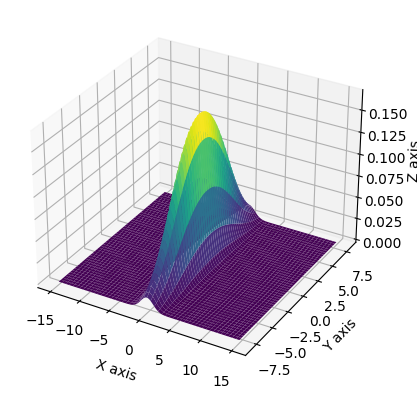

In [8]:
# Figure of the overall cross entropy

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, H2, cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()